In [2]:
import pandas as pd
import numpy as np

1. 다음과 같이 multi-level index를 갖는 데이터프레임을 만들어 보라.

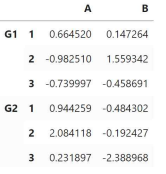

In [4]:
np.random.randn(12)

array([-1.0594458 , -0.14326825,  0.29697122,  0.64006612, -0.33132505,
        0.9798114 , -0.21195968, -1.29112739, -0.08093124,  0.26439338,
       -0.68154133,  0.56014018])

In [5]:
multi_level = pd.DataFrame(np.random.randn(12).reshape(6,2),
                             columns= ["A","B"],
                            index = [["G1","G1","G1","G2","G2","G2"],[1,2,3,1,2,3]])

multi_level


A         B
G1 1 -1.044903 -1.281278
   2  1.088913 -0.138563
   3  0.544374  0.613963
G2 1  1.219603  0.334184
   2 -1.017643 -0.046439
   3  1.315925 -0.698244

In [7]:
import pandas as pd
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
print(hier_index)
hier_index = pd.MultiIndex.from_tuples(hier_index)
print(hier_index)
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]
MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )


A         B
G1 1 -0.294980  0.280099
   2  1.188117 -1.442661
   3  0.769888  1.196178
G2 1 -1.076634  0.806139
   2  1.194468 -1.150245
   3 -0.526939 -0.211005

2. 상기 데이터 프레임에서 아래와 같은 데이터를 출력하고자 할 때 접근하는 코드는?

A 0.153661

B 0.167638

In [8]:
multi_level.loc['G1'].loc[1]

A   -1.044903
B   -1.281278
Name: 1, dtype: float64

3. range(10)에 대해 2022년 8월 1일부터 10일까지 10일동안을 datetime index로 가지는 데이터 프레임을 만들어 보라.

In [9]:
date_time = pd.date_range("2022-08-01",periods=10)
df = pd.DataFrame(np.arange(10), index=date_time)
df

,0
2022-08-01,0
2022-08-02,1
2022-08-03,2
2022-08-04,3
2022-08-05,4
2022-08-06,5
2022-08-07,6
2022-08-08,7
2022-08-09,8
2022-08-10,9


4~5. 다음을 수행해보세요.

- Heart.csv 파일을 읽어드리고, 이를 DataFrame으로 저장하라. 

- 읽어드린 데이터의 결측치 여부를 알아보고, 열별 결측치의 개수를 파악해라. 

- ‘Chestpain’별 평균 chol 수치를 계산해 보라. 

- pivot table을 이용해 (AHD, sex)행별로 chol 수치를 나타내는 표를 만들어 보라.

In [28]:
heart = pd.read_csv('Data\\Heart.csv', index_col=0)
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB
None


In [30]:
print(heart.isna().sum())
print(heart.groupby('ChestPain').mean()['Chol'])

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64
ChestPain
asymptomatic    250.513889
nonanginal      243.965116
nontypical      244.780000
typical         237.130435
Name: Chol, dtype: float64


In [51]:
pd.pivot_table(heart, values='Chol' ,index=['AHD','Sex'])

Chol
AHD Sex            
No  0    256.750000
    1    231.597826
Yes 0    276.160000
    1    246.061404

6. Heart.csv 파일에서 성별(sex)로 AHD (Yes, No)의 여부와 관련한 빈도를 체크해보고 싶다. 이를 파이썬 코드로 구현해보아라.

In [59]:
heart.groupby(['Sex','AHD']).count()['Age']

Sex  AHD
0    No      72
     Yes     25
1    No      92
     Yes    114
Name: Age, dtype: int64

In [54]:
pd.crosstab(heart['Sex'],heart['AHD'])

AHD,No,Yes
Sex,,
0,72,25
1,92,114


7. 다음의 dictionary 데이터를 가지고 dataframe을 만들고, food 컬럼과 rating 컬럼만 선택하여 출력하세요. 

data = {
'food': ['KFC', 'McDonald', 'SchoolFood'],
'price': [1000, 2000, 2500],
'rating': [4.5, 3.9, 4.2]
}

In [72]:
data = {
'food': ['KFC', 'McDonald', 'SchoolFood'],
'price': [1000, 2000, 2500],
'rating': [4.5, 3.9, 4.2]
}
data = pd.DataFrame(data)
data[['food','rating']]

,food,rating
0,KFC,4.5
1,McDonald,3.9
2,SchoolFood,4.2


8. 상기 데이터프레임에서 food 컬럼명을 place라는 컬럼명으로 바꿔 보세요. 

In [53]:
data = pd.DataFrame(data)
print(data)
data.rename(columns={'food':'place'}, inplace=True)
print(data)


,place,price,rating
0,KFC,1000,4.5
1,McDonald,2000,3.9
2,SchoolFood,2500,4.2


In [ ]:
data.index=[1,2,3]
print(data)

9. 다음과 같은 데이터프레임이 있다.

left = pd.DataFrame({'key': ['foo', 'bar', ‘poo’], 'lval': [1, 2, 3]})

right = pd.DataFrame({'key': ['bar', 'foo', ‘woo’], 'rval': [4, 5, 6]})

아래와 같은 결과가 나오도록 merge함수를 써서 구현해 보라.

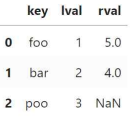


In [74]:
left = pd.DataFrame({'key': ['foo', 'bar', 'poo'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['bar', 'foo', 'woo'], 'rval': [4, 5, 6]})

pd.merge(left,right,on='key',how='left')


,key,lval,rval
0,foo,1,5.0
1,bar,2,4.0
2,poo,3,NaN


10. 9번 문제에서 on = 'key', how='inner' 방식으로 했을 때 기대 되어지는 데이터프레임을 작성해보라.


        key	lval	rval

    0	foo 1	    5.0

    1	bar 2	    4.0